In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
yf.pdr_override()
start = datetime.datetime(2014, 2, 1)
end = datetime.datetime(2019,2,1)
amzn = pdr.get_data_yahoo('AMZN', start = start, end=end)
fb = pdr.get_data_yahoo('FB', start = start, end=end)
mmm = pdr.get_data_yahoo('MMM', start = start, end=end)
ibm = pdr.get_data_yahoo('IBM', start = start, end=end)



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [2]:
fbclose = fb['Adj Close']
amznclose = amzn['Adj Close']
mmmclose = mmm['Adj Close']
ibmclose = ibm['Adj Close']


fbc = fbclose.asfreq('BM', method='bfill')
amznc = amznclose.asfreq('BM', method = 'bfill')
mmmc = mmmclose.asfreq('BM', method = 'bfill')
ibmc = ibmclose.asfreq('BM', method = 'bfill')


ROIfb = (fbc.shift(-1) / fbc - 1)*100
ROIamzn = 100 * ((amznc.shift(-1) / amznc) - 1)
ROImmm = 100 * ((mmmc.shift(-1) / mmmc) - 1)
ROIibm = 100 * ((ibmc.shift(-1) / ibmc) - 1)

In [3]:
ROIfb = ROIfb.fillna(0)
ROIamzn = ROIamzn.fillna(0)
ROImmm = ROImmm.fillna(0)
ROIibm = ROIibm.fillna(0)

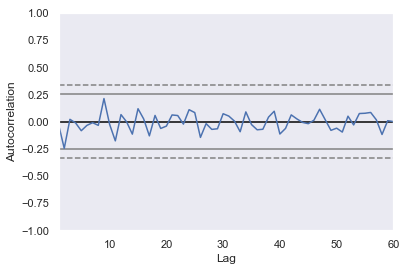

In [7]:
autocorrelation_plot(ROIfb)
